# K-Means Clustering
It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method) and iterates these centroids until no change happens to the position of the centroid. 

# Importing the Dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as plotly

# The Iris Dataset
#### The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

## Importing the Dataset

In [4]:
dataset = pd.read_csv('H:/Datasets/Iris.csv')
dataset.shape

(150, 6)

### Intial records in the Dataset

In [5]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### The Target Values

In [6]:
np.unique(dataset['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Dropping the ID Column

In [7]:
dataset = dataset.drop(['Id'] , axis=1)

In [8]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizing the Dataset

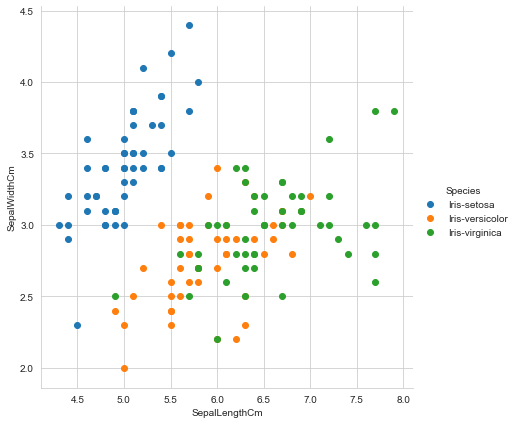

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()



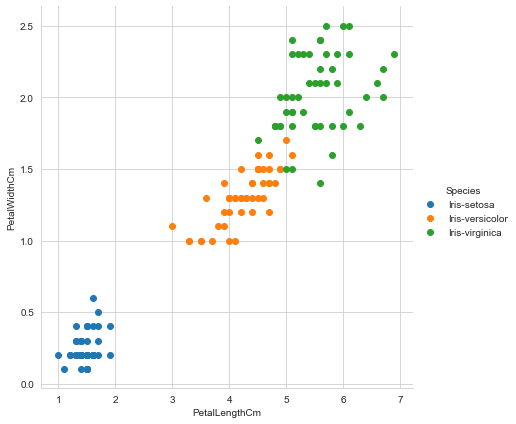

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Species",height = 6).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

### Splitting the feature columns in the dataset [SepalLength, SepalWidth,PetalLength ,PetalWidth]

In [18]:
X = dataset.iloc[:, :-1].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Finding the optimum Number of Clusters

## Elbow Method
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [22]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

In [23]:
print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.930963049671746, 34.19068792479662, 30.035113114955223, 28.099259436618134, 26.076176739926744]


### The point at which the elbow shape is created is 3, that is, our K value or an optimal number of clusters is 3. 

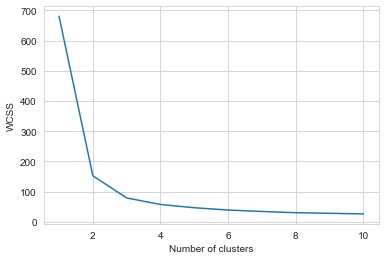

In [24]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()



# Training the model

In [43]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the trained model

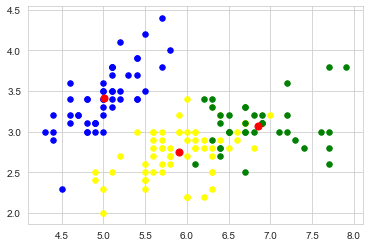

In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')